# Part 3: Modeling and Analyzing Clusters
In this stage, I will feed the data through the agglomerative clustering model, plot a dendrogram, and analyze the resulting clusters by plotting some graphs

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
# import police dataset
pol_df = pd.read_csv('./data/pol_df.csv', encoding = "ISO-8859-1")

#set neighborhood as index
pol_df.set_index(pol_df['Neighborhood'], drop=True, inplace=True)
pol_df.drop(['Neighborhood','Unnamed: 0'], axis=1, inplace=True)

#check shape and format
print(pol_df.shape)
pol_df.head()

(73, 7)


,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Neighborhood,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362


🥵 __Modeling__

In [3]:
# create feature matrix to input into model
feature_mtx = pol_df.values
feature_mtx[:5]

array([[0.00952381, 0.00377778, 0.00160772, 0.01661342, 0.00939306,
        0.00624088, 0.        ],
       [0.31619048, 0.40422222, 0.414791  , 0.16996805, 0.13367052,
        0.37235017, 0.53712297],
       [0.01142857, 0.00355556, 0.00321543, 0.01810437, 0.00939306,
        0.00895431, 0.00232019],
       [0.04952381, 0.02644444, 0.02090032, 0.06751864, 0.03468208,
        0.06000068, 0.01972158],
       [0.05904762, 0.05244444, 0.0562701 , 0.06219382, 0.08815029,
        0.04063359, 0.02436195]])

In [4]:
# modeling using agglomerative clustering algorithm by sklearn
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0.2) # distance_threshold is the cutoff for number of clusters
model.fit(feature_mtx)
print(model.labels_)
print(model.n_clusters_)

[5 3 5 1 1 6 1 5 5 6 6 1 5 5 1 6 5 5 5 0 6 5 2 5 1 1 1 2 1 1 1 1 6 2 1 0 0
 2 1 2 5 6 5 6 1 6 5 6 6 1 4 5 6 6 2 2 6 5 5 6 6 6 5 6 2 6 6 1 6 5 5 1 6]
7


We see that there are 7 clusters when I set distance threshold to 0.2

🥵 __Plot dendrogram__

In [5]:
# I need to write a function to plot a nice dendrogram from the model result


# Below is leaf labeling function that will be fed into dendrogram plotting function later
# this function makes the labels that we want in the dendrogram
n=feature_mtx.shape[0]

def llf(id): # id is the leaf or node number
    if id < n: #leaf
        return '%d %s' % (id, pol_df.index[id]) # label with id and neighborhood name
    else: #node
        return '[%d %d]' % (id, linkage_matrix[id-n,3]) # label with id and number of neighborhoods in the node

    
# In plot_dendrogram(), need to create linkage matrix from model results and feed it into scipy's dendrogram function for 
#  plotting
def plot_dendrogram(model, **kwargs):
    
    # find out how many leaf nodes (each representing a neighborhood) are under each non-leaf node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_): # each row in model.children_represents a non-leaf node
        current_count = 0
        for child_idx in merge: # merge consists the two direct children of a non-leaf node
            if child_idx < n_samples:
                current_count += 1  # leaf node aka a neighborhood
            else:
                current_count += counts[child_idx - n_samples] # non-leaf, need to count the number of children under this node
        counts[i] = current_count
    
    # Form linkage matrix by compiling all necessary columns
    global linkage_matrix # needs to be global variable for the dendrogram function to find it
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    hierarchy.dendrogram(linkage_matrix, leaf_label_func=llf, leaf_rotation=90, **kwargs)
    return

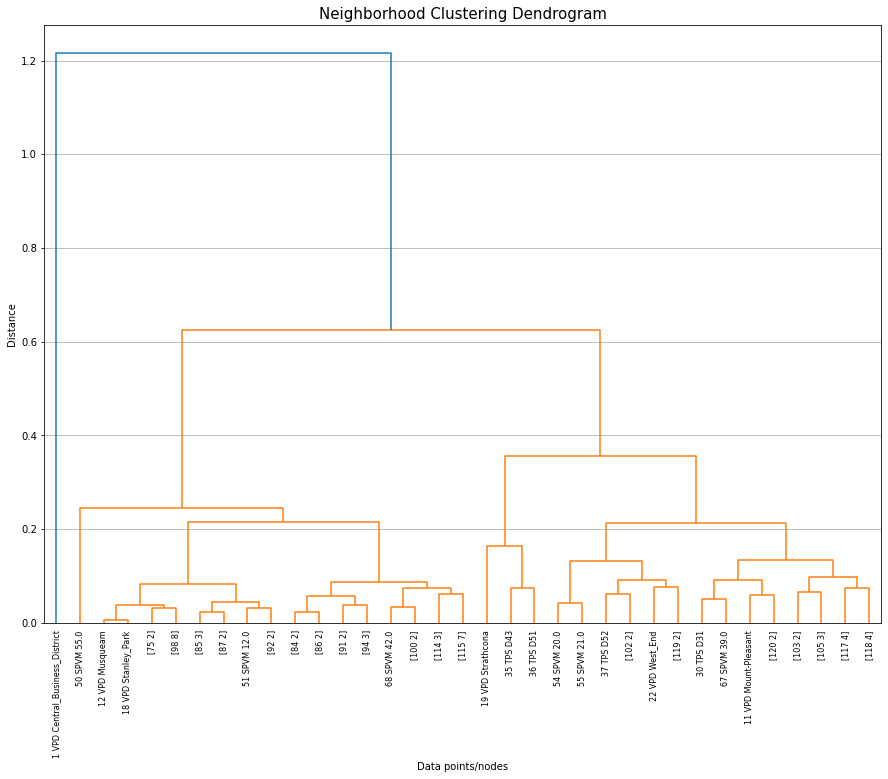

In [6]:
# Now plot
plt.figure(figsize=(15,11))
plt.title('Neighborhood Clustering Dendrogram', fontsize=15)
plt.ylabel("Distance")
plt.xlabel("Data points/nodes")
plt.grid(axis='y')

plot_dendrogram(model, truncate_mode='level', p=6) # use truncate mode so that the dendrogram isn't crowded

🥵 __Analyze Clusters__ <br>
I want to know why the clusters are grouped the way they are

In [7]:
# first, add cluster labels as a column in our dataframe. This way we know which cluster each neighborhood belongs to
pol_df["Cluster Labels"] = model.labels_
pol_df.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels
Neighborhood,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5
VPD Central_Business_District,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123,3
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1


In [8]:
# I want to know how many neighborhoods are in each cluster
pol_df.groupby('Cluster Labels').count()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Cluster Labels,,,,,,,
0,3,3,3,3,3,3,3
1,18,18,18,18,18,18,18
2,8,8,8,8,8,8,8
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
5,20,20,20,20,20,20,20
6,22,22,22,22,22,22,22


Note that cluster 3 and 4 only have one neighborhood in them. I consider them outliers

In [9]:
# I want to know the mean for each feature in each cluster to help me compare clusters
clus_mean = pol_df.groupby('Cluster Labels').mean()
clus_mean

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons
Cluster Labels,,,,,,,
0,0.080871,0.119097,0.126281,0.097628,0.083149,0.068234,0.153613
1,0.051778,0.047795,0.050611,0.050713,0.067087,0.048682,0.040154
2,0.068982,0.068059,0.064160,0.073187,0.044280,0.091260,0.060140
3,0.316190,0.404222,0.414791,0.169968,0.133671,0.372350,0.537123
4,0.001022,0.002109,0.000000,0.000143,0.000000,0.006282,0.183140
5,0.012952,0.009658,0.009952,0.014849,0.015457,0.011092,0.005752
6,0.031695,0.029019,0.026502,0.033714,0.033906,0.026749,0.022726


I want to visualize the above table so it is easier to see the pattern

In [10]:
# list of matplotlib colors I can choose to make my plot pretty :)
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS

OrderedDict([('tab:blue', '#1f77b4'),
             ('tab:orange', '#ff7f0e'),
             ('tab:green', '#2ca02c'),
             ('tab:red', '#d62728'),
             ('tab:purple', '#9467bd'),
             ('tab:brown', '#8c564b'),
             ('tab:pink', '#e377c2'),
             ('tab:gray', '#7f7f7f'),
             ('tab:olive', '#bcbd22'),
             ('tab:cyan', '#17becf')])

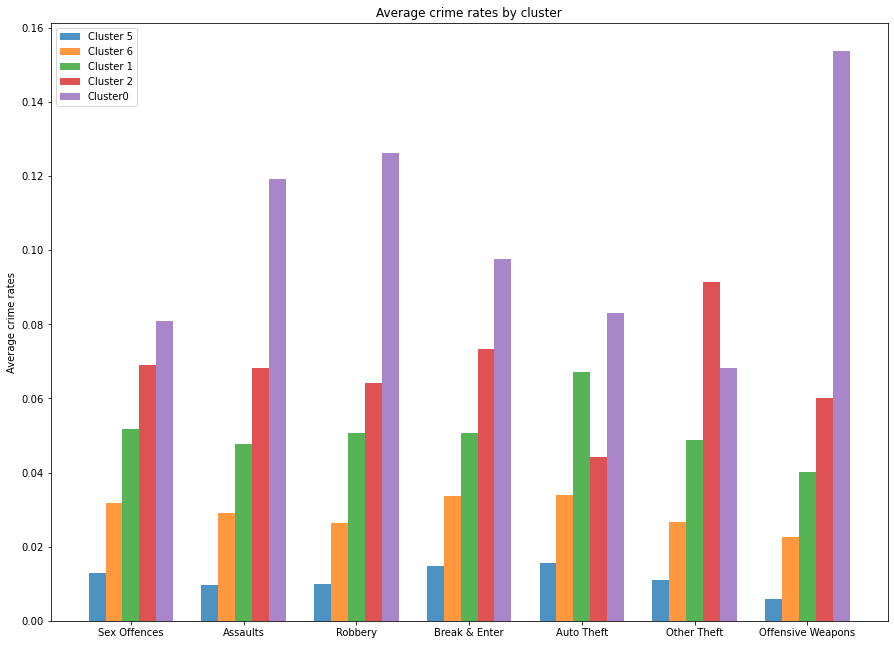

In [11]:
# plot a comparative bar chart
# note that outliers are excluded in this
plt.figure(figsize=(15,11))

index = np.arange(7)
bar_width = 0.15
opacity = 0.8

# each "rects" is a cluster
rects1 = plt.bar(index, clus_mean.loc[5], bar_width,
                 alpha=opacity,
                 color='tab:blue',
                 label='Cluster 5')

rects2 = plt.bar(index+bar_width, clus_mean.loc[6], bar_width,
                 alpha=opacity,
                 color='tab:orange',
                 label='Cluster 6')

rects3 = plt.bar(index+bar_width*2, clus_mean.loc[1], bar_width,
                 alpha=opacity,
                 color='tab:green',
                 label='Cluster 1')

rects4 = plt.bar(index+bar_width*3, clus_mean.loc[2], bar_width,
                 alpha=opacity,
                 color='tab:red',
                 label='Cluster 2')

rects5 = plt.bar(index+bar_width*4, clus_mean.loc[0], bar_width,
                 alpha=opacity,
                 color='tab:purple',
                 label='Cluster0')


plt.ylabel('Average crime rates')
plt.title('Average crime rates by cluster')
plt.xticks(index + bar_width*2, clus_mean.columns)
plt.legend()

plt.show()

Next, I am going to plot a strip plot to see the distribution in each cluster. Because plotting averages are not enough

In [12]:
# exclude the outliers in this analysis
pol_df_no_ol = pol_df.loc[pol_df['Cluster Labels']!=3]
pol_df_no_ol = pol_df_no_ol.loc[pol_df['Cluster Labels']!=4]
pol_df_no_ol.head()

,Sex Offences,Assaults,Robbery,Break & Enter,Auto Theft,Other Theft,Offensive Weapons,Cluster Labels
Neighborhood,,,,,,,,
VPD Arbutus Ridge,0.009524,0.003778,0.001608,0.016613,0.009393,0.006241,0.000000,5
VPD Dunbar-Southlands,0.011429,0.003556,0.003215,0.018104,0.009393,0.008954,0.002320,5
VPD Fairview,0.049524,0.026444,0.020900,0.067519,0.034682,0.060001,0.019722,1
VPD Grandview-Woodland,0.059048,0.052444,0.056270,0.062194,0.088150,0.040634,0.024362,1
VPD Hastings-Sunrise,0.051429,0.026222,0.019293,0.041960,0.061416,0.031069,0.008121,6


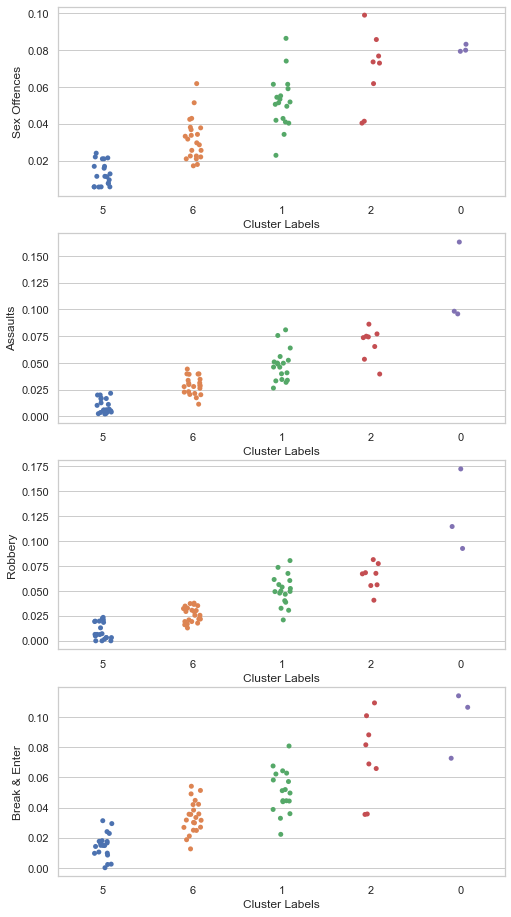

In [13]:
# use seaborn stripplot function to plot one graph for each crime type
sns.set_theme(style='whitegrid')
order = [5,6,1,2,0] # plot in order of lowest to highest crime cluster for easy visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8,16))
sns.stripplot(x='Cluster Labels', y='Sex Offences', order=order, data=pol_df_no_ol, ax=ax1)
sns.stripplot(x='Cluster Labels', y='Assaults', order=order, data=pol_df_no_ol, ax=ax2)
sns.stripplot(x='Cluster Labels', y='Robbery', order=order, data=pol_df_no_ol, ax=ax3)
sns.stripplot(x='Cluster Labels', y='Break & Enter', order=order, data=pol_df_no_ol, ax=ax4);

<AxesSubplot:xlabel='Cluster Labels', ylabel='Offensive Weapons'>

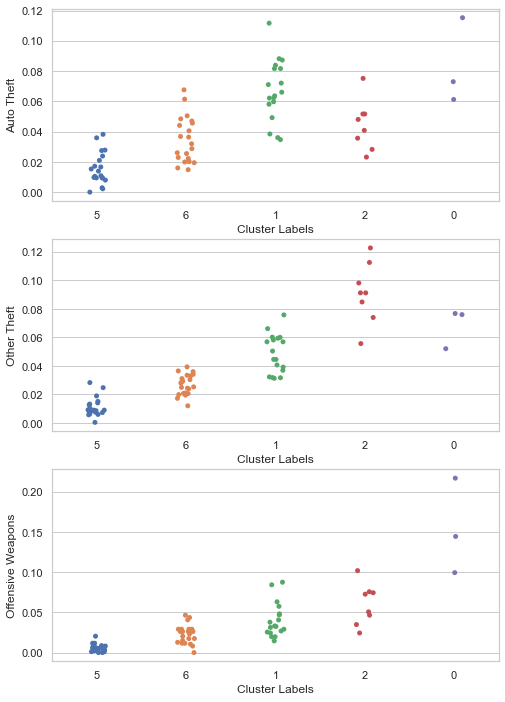

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,12))
sns.stripplot(x='Cluster Labels', y='Auto Theft', order=order, data=pol_df_no_ol, ax=ax1)
sns.stripplot(x='Cluster Labels', y='Other Theft', order=order, data=pol_df_no_ol, ax=ax2)
sns.stripplot(x='Cluster Labels', y='Offensive Weapons', order=order, data=pol_df_no_ol, ax=ax3)

In [15]:
# save new dataframe that includes the cluster labels
pol_df.to_csv("./data/pol_clus_df.csv")